In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

In [6]:
cities = ["Paris", "London", "Oslo", "Beijing"]
lat = []
temp = []

for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])
    
print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.86, 51.51, 59.91, 39.91]
The temperature information received is: [15.42, 11.32, 10, 26]


In [7]:
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}

weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.86,15.42
1,London,51.51,11.32
2,Oslo,59.91,10.00
3,Beijing,39.91,26.00


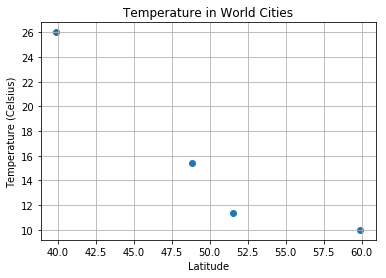

In [8]:
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("temp_graph")
plt.show()